In [62]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---

# Polynomial Regression

## Introduction

**Why Is Polynomial Regression Called Polynomial Linear Regression?**

If you see the equation of polynomial regression carefully, then we can see that we are trying to estimate the relationship between coefficients and y. And the values of x and y are already given to us, only we need to determine coefficients, and the degree of coefficient here is 1 only, and degree one represents simple linear regression Hence, Polynomial Regression is also known as Polynomial Linear Regression as it has a polynomial equation and this is only the simple concept behind this. I hope you got the point right.

**Linear Regression Vs. Polynomial Regression**

Now we know how polynomial regression works and helps to build a model over non-linear data. Let’s compare both algorithms practically and see the results.

First, we will generate the data using some equation ax^2 + bx + c, and then apply simple linear regression to it to form a linear equation. Then we will apply polynomial regression on top of it, which will make an easy comparison between the practical performance of both algorithms.

Initially, we will try it with only one input column and one output column. After having a brief understanding we will try it on high-dimensional data.
Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. It is also called the special case of Multiple Linear Regression in ML because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression. The dataset used in Polynomial regression for training is of non-linear nature .It makes use of a linear regression model to fit the complicated and non-linear functions and datasets.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/ml-fundamentals/ml-regression/polynomial-regression/simple%20and%20polynomial%20regression.jpg
---
name: 'simple linear and polynomial regression infographic'
width: 90%
---
Infographic by [Stoic_Hedonist](https://www.kaggle.com/zsinghrahulk)

## Definition

The Polynomial Regression equation is given below:

$y = W0 * X0 + W1 * X1 + W2 * X1^{2} + .... + WN * X1^{N}$

:::{note}
If you want to learn more about how polynomial regression works, check out  [Polynomial Regression](https://online.stat.psu.edu/stat501/lesson/9/9.8) .
:::

:::{seealso}
Here are [some more examples](https://online.stat.psu.edu/stat501/lesson/9/9.8) of data that could use Polynomial Regression
:::

## Build a polynomial Regression

In this section, we will use a dataset containing real-life information about years of work experience and corresponding salaries. We will step-by-step explore the potential relationship between the data and eventually attempt a simple linear regression on it.

## Import some libraries and the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/ml-fundamental/Real%20estate.csv')

## Understand the basic information and structure of the dataset.

In [ ]:
# View the number of rows and columns in the dataset
df.shape

(414, 8)

In [ ]:
# Display the top 5 rows of the data
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# It provides some information regarding the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
# It provides basic statistical characteristics of the dataset.
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Looking for correlation

**Visualization - side-by-side grid**

Scatter plots are used in polynomial regression to visualize the relationship between the features and the target variable in the dataset. They help in observing the distribution pattern of the data and assessing whether it is suitable for fitting a polynomial regression model. Additionally, scatter plots aid in identifying any outliers or anomalies in the dataset and examining the linearity or non-linearity of the relationship between the variables.

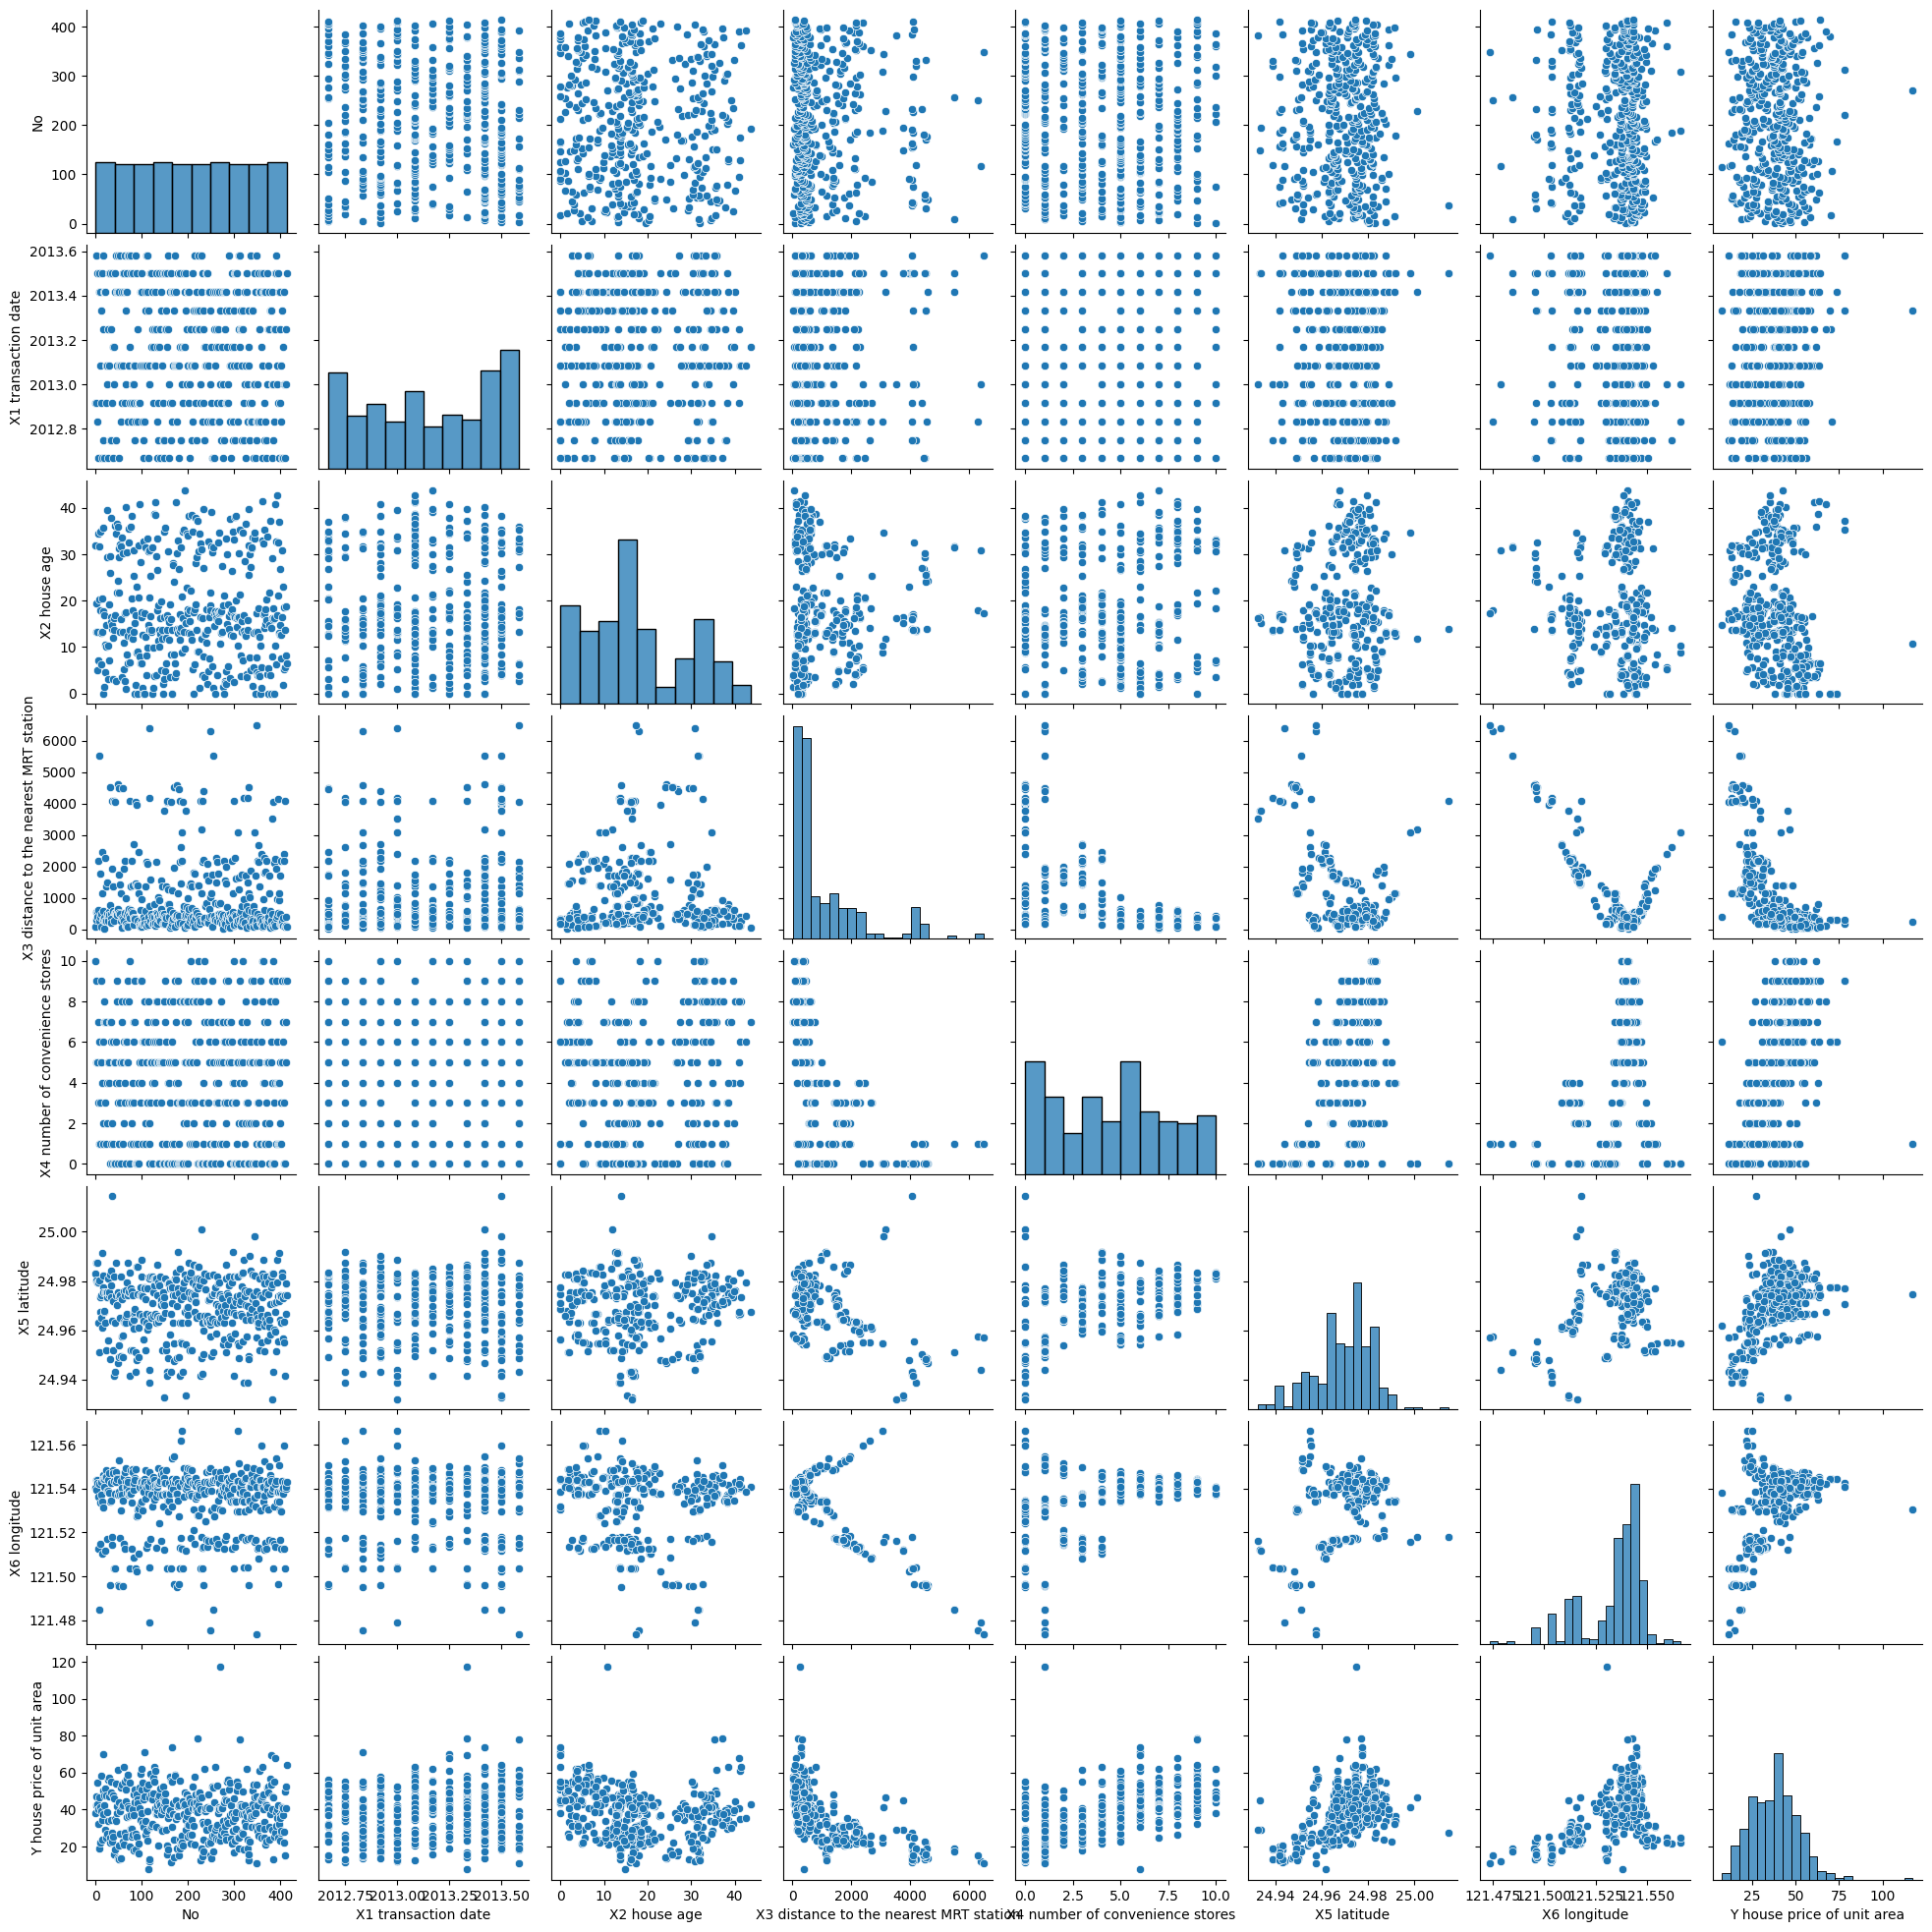

In [ ]:
sns.pairplot(df)

<Figure size 800x500 with 0 Axes>

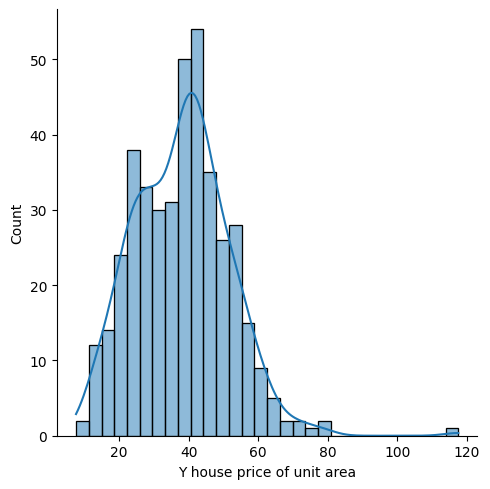

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(df['Y house price of unit area'] , bins=30 , kde=True )

<AxesSubplot: >

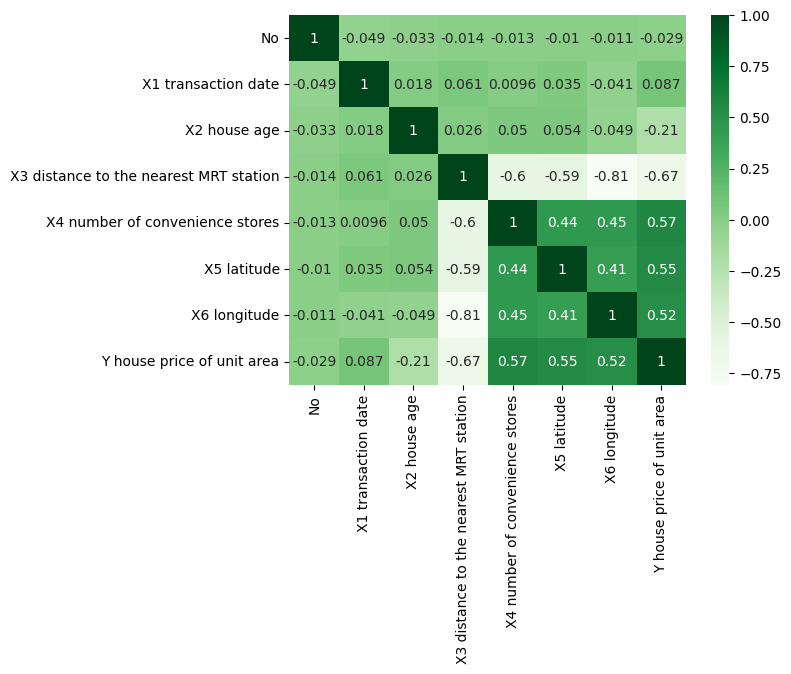

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='Greens')

##  Determine the Features & Target Variable

In [ ]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

## Preprocessing
The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter=PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
poly_features=polynomial_converter.fit(X)

In [ ]:
poly_features=polynomial_converter.transform(X)

In [ ]:
X.shape

(414, 7)

In [ ]:
poly_features.shape
#Poly_Features: X1, X2, X3, X1^2, X2^2, X3^2, X1X2, X1X3, X2X3

(414, 119)

## Split the Dataset to Train & Test
Split arrays or matrices into random train and test subsets
Quick utility that wraps input validation and next and application to input data into a single call for splitting  data in a oneliner.
In machine learning, it is a common practice to split your data into two different sets. These two sets are the training set and the testing set. As the name suggests, the training set is used for training the model and the testing set is used for testing the accuracy of the model.

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split randomly distributes your data into training and testing set according to the ratio provided.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

To compare the shape of different testing and training sets, use the following piece of code:

In [ ]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (414, 8)
shape of input - training set (289, 7)
shape of output - training set (289,)
shape of input - testing set (125, 7)
shape of output - testing set (125,)


## Coeficient Matrix
In mathematics, a system of linear equations is a collection of one or more linear equations involving the same set of variable.

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459


## Residual Analysis

Residual analysis helps us evaluate the performance of the regression model. If the residuals are randomly scattered around the red line, it suggests that the model is capturing the underlying patterns in the data well.

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
pd.DataFrame({'Y_Test':y_test , 'Y_Pred':y_pred , 'Residuals':(y_test-y_pred)}).head()

,Y_Test,Y_Pred,Residuals
176,19.2,12.802665,6.397335
347,11.2,9.549151,1.650849
307,24.7,22.516894,2.183106
299,46.1,48.213227,-2.113227
391,31.3,31.972364,-0.672364


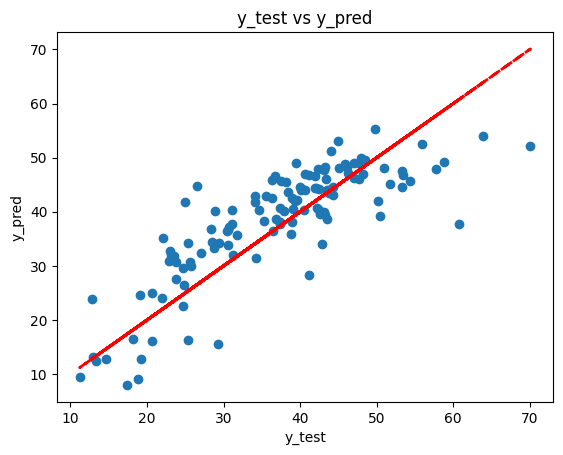

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2)
plt.title('y_test vs y_pred')
plt.show()

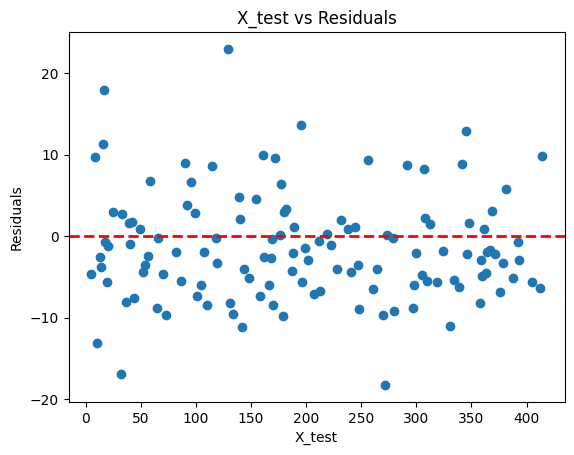

In [ ]:
plt.scatter(X_test[:, 0], y_test-y_pred)
plt.xlabel('X_test')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('X_test vs Residuals')
plt.show()

## Evalutaing the Model
Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future. Evaluating model performance with the data used for training is not acceptable in data science because it can easily generate overoptimistic and overfitted models. There are two methods of evaluating models in data science, Hold-Out and Cross-Validation. To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance.
In this method, the mostly large dataset is randomly divided to three subsets:		
Training set is a subset of the dataset used to build predictive models.
Validation set is a subset of the dataset used to assess the performance of model built in the training phase. It provides a test platform for fine tuning model's parameters and selecting the best-performing model. Not all modeling algorithms need a validation set.
Test set or unseen examples is a subset of the dataset to assess the likely future performance of a model. If a model fit to the training set much better than it fits the test set, overfitting is probably the cause.




In [ ]:
from sklearn import metrics

MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,5.373025
MSE,45.880307
RMSE,6.773500


## Compare to the simple linear regression:

In [ ]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [ ]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple, RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,5.373025,5.373025
MSE,45.880307,45.880307
RMSE,6.773500,6.773500


In [ ]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [ ]:
train_RMSE_list

[9.53710682086247,
 8.037433078253938,
 7.100085930206462,
 5.583238488580172,
 1.8080947934708564,
 0.5145720809205817,
 0.7260295883106024,
 0.37721322713536387,
 0.4353309532030836]

In [ ]:
test_RMSE_list

[6.77350038228024,
 5.692359286426211,
 23.794863805609662,
 297.81077335309794,
 6176.787518255893,
 36393.93147481395,
 202029.65689419792,
 1555732.5246444426,
 15011498.360739073]

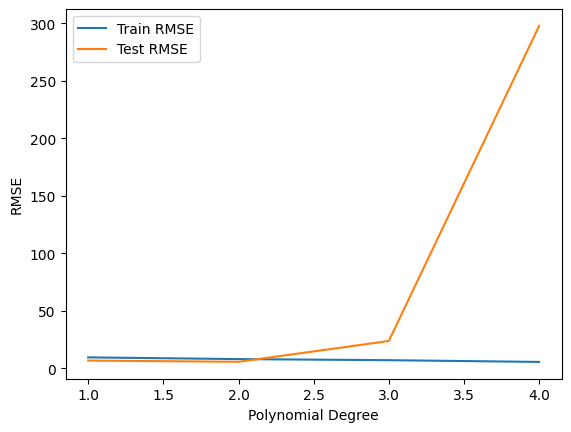

In [ ]:
plt.plot(range(1,5), train_RMSE_list[:4], label='Train RMSE')
plt.plot(range(1,5), test_RMSE_list[:4], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

It seems degree 2 is the best choice for model.

🏆 Well done! We created Polynomial Regression model successfully and compared it with simple linear regression.

## Your turn! 🚀

tbd

## Acknowledgments

Thanks to [Stoic_Hedonist](https://www.kaggle.com/zsinghrahulk) and [Hajar_Nazari](https://www.kaggle.com/vivinbarath) for creating the open-source course [Regression - Linear and Polynomial](https://www.kaggle.com/discussions/getting-started/412228) and  [Polynomial Regression](https://www.kaggle.com/code/hnazari8665/polynomial-regression). It inspires the majority of the content in this chapter.
